In [389]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load
city_csv = "./data/city_data.csv"
ride_csv = "./data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_csv)
ride_df = pd.read_csv(ride_csv)

# Combine the data into a single dataset
combined_df = pd.merge(ride_df, city_df, how = "left")
# Display the data table for preview
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

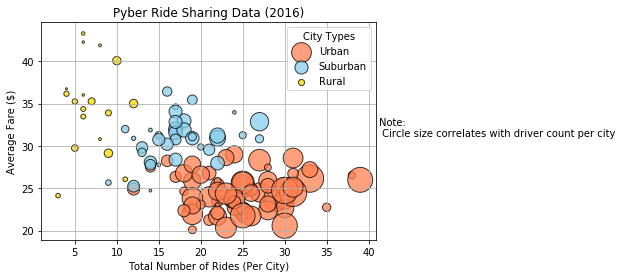

In [441]:
# Obtain the x and y coordinates for each of the three city types

urban = combined_df.loc[combined_df["type"] == "Urban", :]
suburban = combined_df.loc[combined_df["type"] == "Suburban", :]
rural = combined_df.loc[combined_df["type"] == "Rural", :]

u_data = urban.groupby("city").agg({"fare":"mean", "ride_id":"count", "driver_count":"sum"})
u_fare = u_data["fare"]
u_count = u_data["ride_id"]
u_drive = u_data["driver_count"]/3

s_data = suburban.groupby("city").agg({"fare":"mean", "ride_id":"count", "driver_count":"sum"})
s_fare = s_data["fare"]
s_count = s_data["ride_id"]
s_drive = s_data["driver_count"]/2

r_data = rural.groupby("city").agg({"fare":"mean", "ride_id":"count", "driver_count":"sum"})
r_fare = r_data["fare"]
r_count = r_data["ride_id"]
r_drive = r_data["driver_count"]

# Build the scatter plots for each city types
urban_plt = plt.scatter(u_count, u_fare,c="coral", edgecolors="black", s=u_drive, alpha=0.75, label = "Urban")
suburban_plt = plt.scatter(s_count, s_fare, c="skyblue", edgecolors="black",s=s_drive, alpha=0.75, label = "Suburban")
rural_plt = plt.scatter(r_count, r_fare, c="gold", edgecolors="black",s=r_drive, alpha=0.75, label = "Rural")

# Incorporate the other graph properties

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid(True)

# Create a legend
plt.legend(title="City Types",loc="best");

# Incorporate a text label regarding circle size
plt.annotate(f"Note: \n Circle size correlates with driver count per city",
            xy=(1.01, .5), xytext=(0,0),
            xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points',
            size=10, ha='left', va='bottom')
# Save/Show Figure
plt.savefig("./images/PyberScatterData.png",bbox_inches='tight')
plt.show()

## Total Fares by City Type

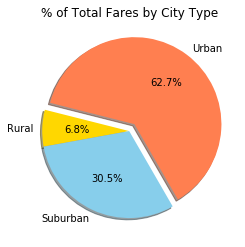

In [451]:
# Calculate Type Percents
total_fares = combined_df["fare"].sum()
t_u_fares = urban["fare"].sum()
t_s_fares = suburban["fare"].sum()
t_r_fares = rural["fare"].sum()

u_f_per = (t_u_fares/total_fares *100)
s_f_per = (t_s_fares/total_fares *100)
r_f_per = (t_r_fares/total_fares *100)

# Build Pie Chart
types = ["Urban","Rural", "Suburban"]
colors = ["coral","gold","skyblue"]
explode = (0.1,0,0)
f_data = (u_f_per, r_f_per, s_f_per)

plt.title("% of Total Fares by City Type")
plt.pie(f_data, explode=explode, labels=types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=300)

# Save/Show Figure
plt.savefig("./images/FaresPie.png",bbox_inches='tight')
plt.show()

## Total Rides by City Type

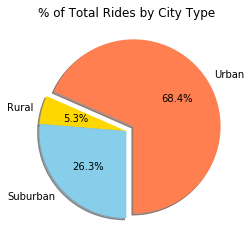

In [452]:
# Calculate Ride Percents
total_rides = len(combined_df)
t_u_rides = len(urban)
t_s_rides = len(suburban)
t_r_rides = len(rural)

u_r_per = t_u_rides/total_rides *100
s_r_per = t_s_rides/total_rides *100
r_r_per = t_r_rides/total_rides *100

# Build Pie Chart
r_data = (u_r_per, r_r_per, s_r_per)

plt.title("% of Total Rides by City Type")
plt.pie(r_data, explode=explode, labels=types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=270)

# Save Figure
plt.savefig("./images/RidesPie.png",bbox_inches='tight')

## Total Drivers by City Type

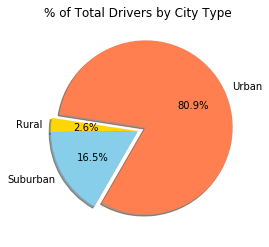

In [457]:
# Calculate Driver Percents
driver_u = city_df.loc[city_df["type"] == "Urban", :]
driver_s = city_df.loc[city_df["type"] == "Suburban", :]
driver_r = city_df.loc[city_df["type"] == "Rural", :]

total_drivers = city_df["driver_count"].sum()
t_u_drivers = driver_u["driver_count"].sum()
t_s_drivers = driver_s["driver_count"].sum()
t_r_drivers = driver_r["driver_count"].sum()

u_d_per = t_u_drivers/total_drivers *100
s_d_per = t_s_drivers/total_drivers *100
r_d_per = t_r_drivers/total_drivers *100

# Build Pie Charts
d_data = (u_d_per, r_d_per, s_d_per)

plt.title("% of Total Drivers by City Type")
plt.pie(d_data, explode=explode, labels=types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=240)

# Save/Show Figure
plt.savefig("./images/DriversPie.png",bbox_inches='tight')
plt.show()
